# 군집 분석 
- 주어진 데이터들을 특성에 따라 유사한 것끼리 묶음으로써 각 유형별 특징을 분석하는 기법

- 분류 분석과 동일하게 데이터는 하나의 군집에 할당됨
    - 단, 군집의 경우 비지도 학습의 일종으로 레이블 정보를 학습과정에서 이용하지 않음

- 같은 군집 내 데이터들의 거리를 최소화 하거나 다른 군집간의 거리를 최대화하는 군집을 형성 
    - 거리 계산은 유클리드 거리(직선 거리)가 보편적으로 많이 사용됨

- 거리만 잘 적용되면 모든 유형의 데이터에 적용이 가능하나 거리와 가중치 정의가 어렵고 결과 해석이 어려운 단점이 있음

# 군집 분석 방법론
- 계층적(Hierarchical) 방법
    - 가까운 개체끼리 차례로 묶거나 멀리 떨어진 개체를 차례로 분리해 가는 군집 방법
    - 한 번 군집에 할당된 객체는 다시 분리되지 않는 것이 특징
    - 비계층적 방법에 비해 계산량이 많고 시간이 오래 걸림

- 비계층적(Non Hierarchical) 방법
    - 랜덤으로 데이터를 군집화하고 군집 과정에서 값의 변화에 따라 각 데이터들을 적절한 군집으로 이동시키면서 분리해 가는 군집 방법


# 군집 분석 사용 예
- 고객 분류
    - 고객을 구매 이력이나 웹사이트 내 행동 등을 기반으로 클러스터로 모을 수 있음
    - 고객 그룹마다 제품 추천이나 마케팅 전략을 다르게 적용할 수 있음
    - 동일 군집 내의 고객이 좋아하는 콘텐츠를 추천하는 추천 시스템을 만들 수 있음

- 이상치 탐지
    - 각 군집에 대한 데이터의 친화성(데이터가 군집에 얼마나 잘 맞는지)을 측정할 수 있음 
    - 모든 군집에 대해 친화성이 낮은 샘플은 이상치일 가능성이 높음
    - 제조 분야의 결함 탐지, 부정 거래 감지 등에서 활용 가능

- 이외에도 검색 엔진, 차원 축소, 준지도 학습, 이미지 분할과 같은 영역에서도 사용 가능

In [1]:
# 환경 설정
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split 

In [2]:
# 군집 데이터 가져오기
df = pd.read_csv('/mnt/elice/dataset/iris.csv')
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
# 데이터 분할하기
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# 4개의 특성을 가지고 있어 시각화 하기 어려움이 존재
# PCA를 통해 2개의 특성으로 차원을 축소
from sklearn.decomposition import PCA
P = PCA(n_components=2)
X_PCA = P.fit_transform(X)
X.shape, X_PCA.shape

((150, 4), (150, 2))

In [5]:
# 기존 데이터 대비 분산 비율 조회
P.explained_variance_ratio_ 

# 원본 데이터의 97% 정도를 설명할 수 있다.

array([0.92461872, 0.05306648])

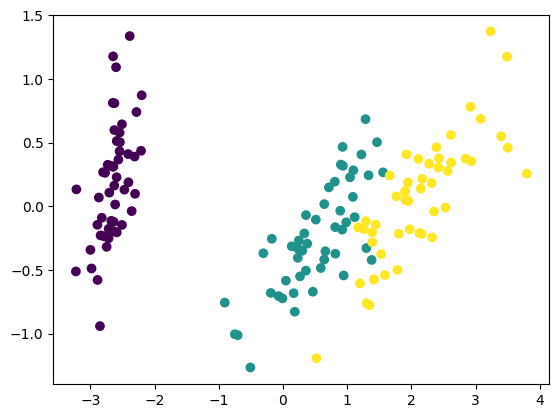

In [6]:
# PCA된 데이터를 이용하여 시각화
plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=Y)

# K Means
- 비지도 학습 기반의 대표적인 비계층적 군집 알고리즘
- 사전에 정의된 군집 수 K개로 데이터를 분할
    - 데이터는 K개의 군집 중심에서 가장 가까운 군집에 할당
    - 군집의 중심점과 데이터 간의 거리를 계산하기 때문에 계층적 군집 알고리즘에 비해 계산량이 적음
- 최적의 군집 수 K를 정의하는 것이 많이 어려움

## 군집 형성 과정
- Step 1 랜덤하게 K개(사전의 정의)의 중앙점을 지정
- Step 2 유클리드 거리를 이용하여 군집의 중심점과의 거리 계산 및 가장 거리가 가까운 군집으로 군집 할당
- Step 3 군집 내 데이터의 평균을 계산 후 새로운 중심점으로 배정 및 중심점이 더 이상 이동 안 할 때까지 반복

In [7]:
# KMeans 모델 생성
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3) # 군집은 3개로 형성

In [8]:
# 모델 학습
model.fit(X_PCA) # 특성만 사용

KMeans(n_clusters=3)

In [9]:
# 군집의 중심점 확인
model.cluster_centers_

array([[-2.64241546,  0.19088505],
       [ 0.66567601, -0.3316042 ],
       [ 2.34652659,  0.27393856]])

In [10]:
# fit 과정에서 사용된 데이터의 군집 결과 확인
model.labels_

# 0, 1, 2는 군집 번호임. 레이블이 아님!

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

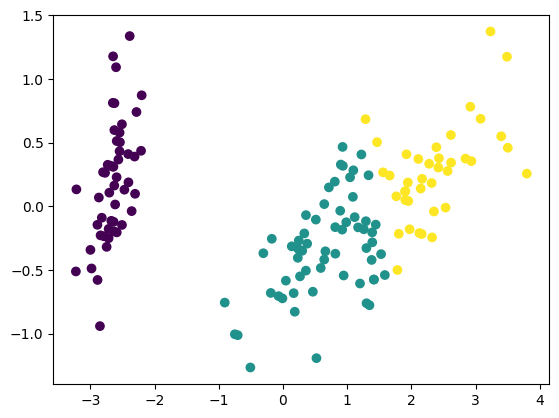

In [11]:
# 군집 결과시각화
plt.scatter(X_PCA[:, 0], X_PCA[:, 1], c=model.labels_)

# k-means가 선형 결정 경계이기 때문에 군집이 맞닿는 부분에서 구분이 잘 안될 수 있음

In [12]:
# 비선형 경계 데이터 불러오기
df = pd.read_csv('/mnt/elice/dataset/moon.csv')
df

,X1,X2,y
0,0.816805,0.521645,0
1,1.618596,-0.379829,1
2,-0.021270,0.273728,1
3,-1.021810,-0.075440,0
4,1.766546,-0.170699,1
...,...,...,...
195,-0.536334,0.860268,0
196,1.882817,0.244356,1
197,0.175752,-0.007231,1
198,0.124236,1.007902,0


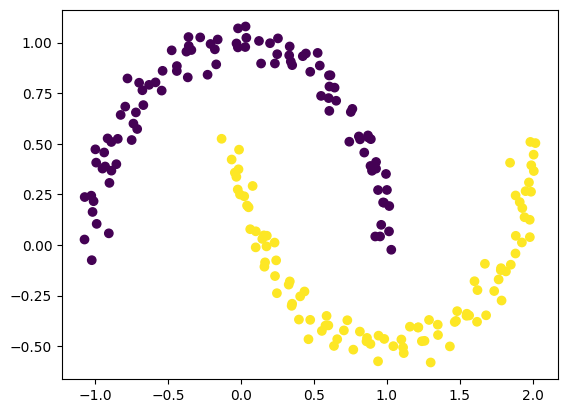

In [13]:
# 데이터 시각화
plt.scatter(df['X1'], df['X2'], c=df['y'])

In [14]:
# KMeans 모델 생성
model = KMeans(n_clusters=2) # 군집은 2개로 형성

In [15]:
# 모델 학습
model.fit(df[['X1', 'X2']]) # 특성만 사용

KMeans(n_clusters=2)

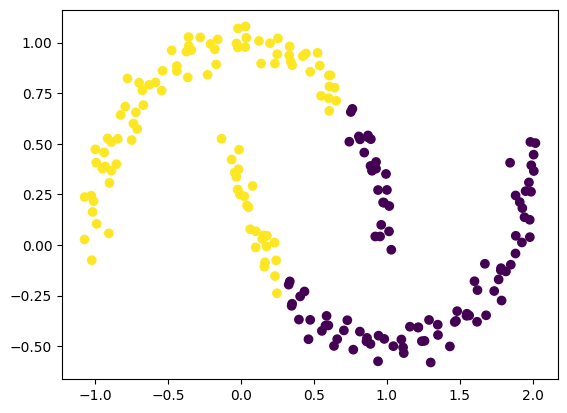

In [16]:
# 군집 결과시각화
plt.scatter(df['X1'], df['X2'], c=model.labels_)

# 선형적 결정 경계기 때문에 우리 예상과 다르게 경계가 나눠짐

- K-Means 군집 간의 경계는 선형적으로 복잡한 경계를 갖는 경우 올바르게 군집화할 수 없음
- Spectral Clustering, DBSCAN과 같은 다른 군집 방법을 이용하는 경우 올바르게 군집 가능

In [17]:
# DBSCAN 모델 생성
from sklearn.cluster import DBSCAN
model = DBSCAN() 

In [18]:
# 모델 학습
model.fit(df[['X1', 'X2']]) # 특성만 사용

DBSCAN()

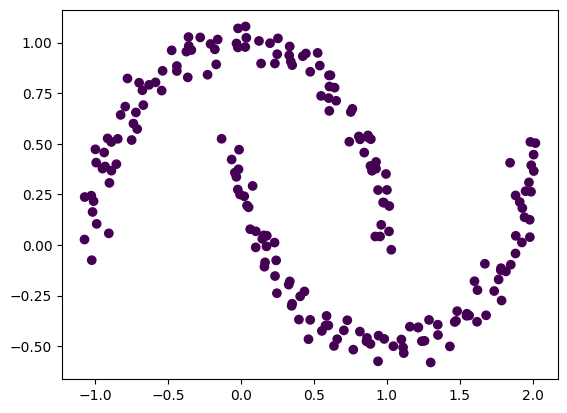

In [19]:
# 군집 결과시각화
plt.scatter(df['X1'], df['X2'], c=model.labels_)

In [20]:
model.labels_

# 모두 0번으로 같은 군집에 할당된 것을 볼 수 있다.
# epsilon 때문!

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

- min_samples 또는 eps 값의 조절이 필요하지만 최우선적으로는 표준화를 적용
    - DBSCAN의 경우 밀도를 기반으로 하기 때문에 데이터 스케일에 영향이 있음
    - 데이터의 값 범위가 0\~1사이에서 0.1과 0\~100사이의 0.1은 차이가 있기 때문

In [21]:
# 정규화 진행
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df[['X1', 'X2']])

In [22]:
model = DBSCAN() 
model.fit(x_scaled) # 특성만 사용

DBSCAN()

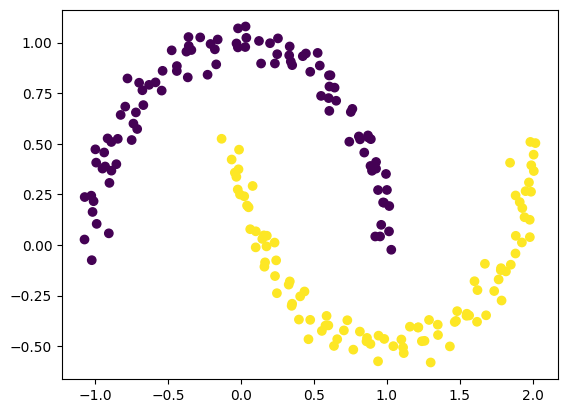

In [23]:
# 군집 결과시각화
plt.scatter(df['X1'], df['X2'], c=model.labels_)

# 비선형적으로 잘 군집이 나눠짐!

# 군집 알고리즘 평가
- 군집 알고리즘의 경우 정답 값이 존재하는 경우 ARI(Adjusted Rand Index) 또는 NMI(Normalized Mutual Information)과 같은 지표를 이용하여 평가

- 군집의 번호는 랜덤하게 배정되기 때문에 위치의 값을 비교하는 정확도는 성능이 부정확하게 나올 수 있음

- 군집 알고리즘은 비지도 학습에서 사용되는 방법으로 레이블 되지 않은 데이터가 있을 때 많이 이용하는 방법

- 따라서 ARI 또는 NMI와 같은 정답 값을 이용하여 모델의 성능을 계산하기에는 많은 어려움이 있음

- 각 데이터와 가장 가까운 중심점 사이의 평균 제곱 거리를 이용하는 이너샤(inertia)를 사용하면 K값에 따른 이너샤의 변화를 확인할 수 있고 적정 군집 수 K를 정의할 수 있음

- 실제값이 없다면 실루엣 가중치를 사용함
    - 한 클러스터 안에 데이터들이 다른 클러스터와 비교해서 얼마나 비슷한 지를 나타냄
        - 응집도와 분리도를 이용하여 계산
    - 클러스터가 최적화되었다면 실루엣 가중치는 1에 가까운 숫자로 나옴


In [24]:
# 군집 모델 평가를 위한 데이터 불러오기
df = pd.read_csv('/mnt/elice/dataset/iris.csv')

In [25]:
# 데이터 분할하기
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score

model = KMeans(n_clusters=3)
model.fit(X) 

print('ACC:', accuracy_score(Y, model.labels_)) # 정확도가 굉장히 낮음. 군집의 번호와 레이블이 일치하지 않기 때문  
# ARI, NMI는 이 차이를 보정해주기 때문에 더 높게 나옴.
print('ARI:', adjusted_rand_score(Y, model.labels_))
print('NMI:', normalized_mutual_info_score(Y, model.labels_))

ACC: 0.24
ARI: 0.7302382722834697
NMI: 0.7581756800057785


In [27]:
# 이너셔 조회
model.inertia_

# intertia의 값이 급격하게 변하는 지점이 최적의 k값일 수 있다.

78.85144142614601

In [28]:
# 실루엣 계수 (cluster 형성 결과에 대한 평가)
# 높다고 해서 항상 잘 만들어진 것은 아님
from sklearn.metrics import silhouette_score
silhouette_score(X, model.labels_)

0.5528190123564102

## 제출

제출을 위해 새로 불러온 `iris.csv` 데이터를 PCA를 통해 2차원으로 줄인 결과가 `X_PCA`에 저장되어 있습니다. 이를 이용해 **클러스터 개수를 3개**로 지정한 K-Means 모델을 학습하고 각 클러스터의 중심점을 `result`에 저장하세요.
- K-Means 모델을 생성할 때 **반드시 `random_state=SEED`를 지정**합니다. 이를 지정하지 않으면 제대로 채점되지 않습니다.

In [29]:
# SEED 값 바꾸면 제대로 채점되지 않을 수 있습니다.
SEED = 2023

df = pd.read_csv('/mnt/elice/dataset/iris.csv')

X = df.iloc[:, :-1]
Y = df.iloc[:, -1]
P = PCA(n_components=2, random_state=SEED)
X_PCA = P.fit_transform(X)

# TODO: K-Means 모델을 만들고 학습합니다.
model = KMeans(n_clusters = 3, random_state = SEED).fit(X_PCA)
result = model.cluster_centers_

## 채점 수행

아래 코드는 채점 수행을 위한 코드입니다.

따라서 이를 수정했을시 **채점이 제대로 이루어지지 않습니다.**

**주의**: 채점 코드를 실행하기 전에 반드시 코드 파일을 한번 저장하시길 바랍니다.

In [30]:
import os
import numpy as np

assert isinstance(result, np.ndarray), \
    "'result' 변수에 각 클러스터의 중심점이 numpy array 형태로 저장되어 있는지 확인하세요."

np.save('result.npy', result)

os.system('elice_grade result.npy cds_ai_exercise.ipynb')

send files ['result.npy', 'cds_ai_exercise.ipynb'] for grade...
waiting result...
waiting result...
waiting result...
done!

Score: 100.000000
Duration: 1.579 seconds
=== Message ===
제출 완료되었습니다.


0